In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir ('/content/drive/MyDrive/ComLing/Codes/')

In [23]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import numpy as np
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.debias import debias
from scipy import stats
from debiaswe.we import WordEmbedding
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import svm
from random import shuffle
import random
random.seed(10)
import gzip
# !gunzip /content/drive/MyDrive/ComLing/Codes/embeddings/GoogleNews-vectors-negative300.bin.gz

In [4]:
E = WordEmbedding('./embeddings/w2v_gnews_small.txt') # use this one for understanding the codes 
# E = WordEmbedding('./embeddings/GoogleNews-vectors-negative300.bin')

*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine


In [17]:
adjective_words =[]
with open('./data/adj.txt') as fp:
   line = fp.readline()
   while line:
     line = line.strip()
     adjective_words.append(line)
     line = fp.readline()

adjective_in_words = []
for word in adjective_words:
  if word in E.words:
    adjective_in_words.append(word)

Human Agreement Analysis

In [12]:
v_gender = E.diff('she', 'he')

sp = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])
sp_word = []
sp_value= []
n = 0

while n<len(sp):
    sp_word.append(sp[n][1])
    sp_value.append(sp[n][0])
    n=n+1

human_relatedness = []
word2vec_relatedness = []

extreme = open("./data/human_extreme.txt")
for line in extreme.readlines():
    word = line.split(";")[0]
    h_r = line.split(";")[1]
    if word in sp_word:
      word2vec_relatedness.append(sp_value[sp_word.index(word)])
      human_relatedness.append(abs(float(h_r)-10))

print(stats.pearsonr(human_relatedness, word2vec_relatedness))

(0.8612737509582733, 6.549510111475629e-08)


Subset of adjectives Analysis

In [14]:
def make_zeros(number):
    return [0] * number

def Average(lst):
    return sum(lst) / len(lst)

adjective_words =[]
file = open("./data/phy_adj.txt")
for line in file.readlines():
    word = line.split(",")[0]
    adjective_words.append(word)
adjective_in_words = []
for word in adjective_words:
  if word in E.words:
    adjective_in_words.append(word)

v_gender = E.diff('she', 'he')
sp = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])

value =[]
n = 0

while n<len(sp):
    sp_value = (sp[n][0])
    value.append(abs(sp_value))
    n=n+1

list = make_zeros(len(value))
print(Average(value))
print(stats.ttest_ind(list,value))

0.08812841349704699
Ttest_indResult(statistic=-7.157208310444879, pvalue=8.669330849591236e-09)


Comparison Test 

*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
{('COUNCILMAN', 'COUNCILWOMAN'), ('twin_brother', 'twin_sister'), ('FELLA', 'GRANNY'), ('males', 'females'), ('fella', 'granny'), ('Councilman', 'Councilwoman'), ('boys', 'girls'), ('he', 'she'), ('gelding', 'mare'), ('Brother', 'Sister'), ('CONGRESSMAN', 'CONGRESSWOMAN'), ('FATHERHOOD', 'MOTHERHOOD'), ('Gentlemen', 'Ladies'), ('kings', 'queens'), ('Fatherhood', 'Motherhood'), ('GRANDPA', 'GRANDMA'), ('UNCLE', 'AUNT'), ('Testosterone', 'Estrogen'), ('Grandsons', 'Granddaughters'), ('GELDING', 'MARE'), ('MAN', 'WOMAN'), ('BOYS', 'GIRLS'), ('BROTHERS', 'SISTERS'), ('Businessman', 'Businesswoman'), ('Fraternity', 'Sorority'), ('Nephew', 'Niece'), ('Men', 'Women'), ('King', 'Queen'), ('Man', 'Woman'), ('fraternity', 'sorority'), ('Kings', 'Queens'), ('KING', 'QU

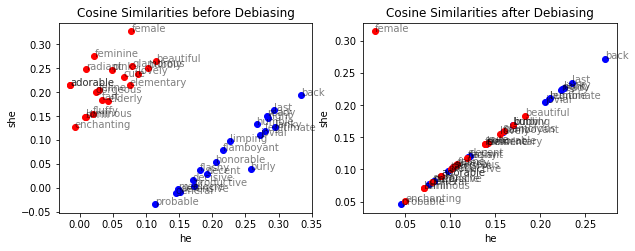

In [21]:
E = WordEmbedding('./embeddings/w2v_gnews_small.txt')

adjective_words =[]
with open('./data/adj.txt') as fp:
   line = fp.readline()
   while line:
     line = line.strip()
     adjective_words.append(line)
     line = fp.readline()

adjective_in_words = []
for word in adjective_words:
  if word in E.words:
    adjective_in_words.append(word)

v_gender = E.diff('she', 'he')


sp = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])
sp_he = sp[0:20]
sp_she = sp[-20:]


n = 0

v_she = E.vecs[E.index['she']]
v_she = v_she.reshape(1,-1)
v_he = E.vecs[E.index['he']]
v_he= v_he.reshape(1,-1)

label_he=[]
label_she=[]
cos_sim_he_he = []
cos_sim_she_he = []
cos_sim_he_she= []
cos_sim_she_she= []


while n<len(sp_he):
    word_he = sp_he[n][1]
    label_he.append(word_he)
    sp_vector_he = (E.vecs[E.index[word_he]])
    sp_vector_he = sp_vector_he.reshape(1, -1)
    cos_sim_he_he.append(cosine_similarity(v_he, sp_vector_he)[0])
    cos_sim_she_he.append(cosine_similarity(v_she, sp_vector_he)[0])

    word_she = sp_she[n][1]
    label_she.append(word_she)
    sp_vector_she = (E.vecs[E.index[word_she]])
    sp_vector_she = sp_vector_she.reshape(1, -1)
    cos_sim_he_she.append(cosine_similarity(v_he, sp_vector_she)[0])
    cos_sim_she_she.append(cosine_similarity(v_she, sp_vector_she)[0])
    n=n+1

with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)
with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)
with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)

debias(E, gender_specific_words, defs, equalize_pairs)

sp_debiased = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])

n = 0

cos_sim_he_he_debiased = []
cos_sim_she_he_debiased = []
cos_sim_he_she_debiased= []
cos_sim_she_she_debiased= []


while n<len(sp_he):
    word_he = sp_he[n][1]
    sp_vector_he = (E.vecs[E.index[word_he]])
    sp_vector_he = sp_vector_he.reshape(1, -1)
    cos_sim_he_he_debiased.append(cosine_similarity(v_he, sp_vector_he)[0])
    cos_sim_she_he_debiased.append(cosine_similarity(v_she, sp_vector_he)[0])

    word_she = sp_she[n][1]
    sp_vector_she = (E.vecs[E.index[word_she]])
    sp_vector_she = sp_vector_she.reshape(1, -1)
    cos_sim_he_she_debiased.append(cosine_similarity(v_he, sp_vector_she)[0])
    cos_sim_she_she_debiased.append(cosine_similarity(v_she, sp_vector_she)[0])
    n=n+1

fig = plt.figure(figsize=(10,3.5))
ax1 = fig.add_subplot(121)
ax1.scatter(cos_sim_he_he,cos_sim_she_he,color = 'blue')
for i, word in enumerate(label_he):
            ax1.annotate(word, alpha=0.5, xy=(cos_sim_he_he[i],cos_sim_she_he[i]))
ax1.scatter(cos_sim_he_she,cos_sim_she_she,color = 'red')
for i, word in enumerate(label_she):
            ax1.annotate(word, alpha=0.5, xy=(cos_sim_he_she[i],cos_sim_she_she[i]))
ax1.set_xlabel('he')
ax1.set_ylabel('she')
ax1.set_title("Cosine Similarities before Debiasing")

ax2 = fig.add_subplot(122)
ax2.scatter(cos_sim_he_he_debiased,cos_sim_she_he_debiased,color = 'blue')
for i, word in enumerate(label_he):
            ax2.annotate(word, alpha=0.5, xy=(cos_sim_he_he_debiased[i],cos_sim_she_he_debiased[i]))
ax2.scatter(cos_sim_he_she_debiased,cos_sim_she_she_debiased,color = 'red')
for i, word in enumerate(label_she):
            ax2.annotate(word, alpha=0.5, xy=(cos_sim_he_she_debiased[i],cos_sim_she_she_debiased[i]))
ax2.set_xlabel('he')
ax2.set_ylabel('she')
ax2.set_title("Cosine Similarities after Debiasing")
plt.show()

Neighbor clustering

*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
muscular
bald
handsome
strong
athletic
thin
slim
slender
beautiful
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
{('COUNCILMAN', 'COUNCILWOMAN'), ('twin_brother', 'twin_sister'), ('FELLA', 'GRANNY'), ('males', 'females'), ('fella', 'granny'), ('Councilman', 'Councilwoman'), ('boys', 'girls'), ('he', 'she'), ('gelding', 'mare'), ('Brother', 'Sister'), ('CONGRESSMAN', 'CONGRESSWOMAN'), ('FATHERHOOD', 'MOTHERHOOD'), ('Gentlemen', 'Ladies'), ('kings', 'queens'), ('Fatherhood', 'Motherhood'), ('GRANDPA', 'GRANDMA'), ('UNCLE', 'AUNT'), ('Testosterone', 'Estrogen'), ('Grandsons', 'Granddaughters'), ('GELDING', 'MARE'), ('MAN', 'WOMAN'), ('BOYS', 'GIRLS'), ('BROTHERS', 'SISTERS'), ('Businessman', 'Businesswoman'), ('Fraternity', 'Sorority'), ('Nephew', 'Niece'), ('Men', 'Women'), ('King', 'Queen'), ('Man', 'Wom

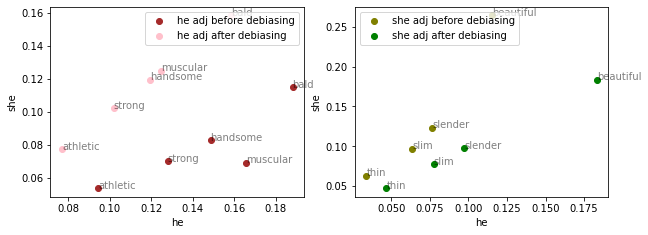

In [22]:
E = WordEmbedding('./embeddings/w2v_gnews_small.txt')

adjective_words =[]

adjective_words =[]
file = open("./data/phy_adj_subset.txt")
for line in file.readlines():
    word = line.split(",")[0]
    adjective_words.append(word)

adjective_in_words = []
for word in adjective_words:
  if word in E.words:
    adjective_in_words.append(word)
v_gender = E.diff('she', 'he')

sp = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])

n = 0

v_she = E.vecs[E.index['she']]
v_she = v_she.reshape(1,-1)
v_he = E.vecs[E.index['he']]
v_he= v_he.reshape(1,-1)

label_he=[]
label_she=[]


cos_sim_he_he = []
cos_sim_she_he = []
cos_sim_he_she= []
cos_sim_she_she= []
label_he=[]
label_she=[]

while n<len(sp):
    if float(sp[n][0]) < 0:
        word_he = sp[n][1]
        print(word_he)
        label_he.append(word_he)
        sp_vector_he = (E.vecs[E.index[word_he]])
        sp_vector_he = sp_vector_he.reshape(1, -1)
        cos_sim_he_he.append(cosine_similarity(v_he, sp_vector_he)[0])
        cos_sim_she_he.append(cosine_similarity(v_she, sp_vector_he)[0])
    else:
        word_she = sp[n][1]
        print(word_she)
        label_she.append(word_she)
        sp_vector_she = (E.vecs[E.index[word_she]])
        sp_vector_she = sp_vector_she.reshape(1, -1)
        cos_sim_he_she.append(cosine_similarity(v_he, sp_vector_she)[0])
        cos_sim_she_she.append(cosine_similarity(v_she, sp_vector_she)[0])
    n=n+1

with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)
with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)
with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)
debias(E, gender_specific_words, defs, equalize_pairs)

sp_debiased = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])

n = 0

cos_sim_he_he_debiased = []
cos_sim_she_he_debiased = []
cos_sim_he_she_debiased= []
cos_sim_she_she_debiased= []


while n<len(sp):
    if float(sp[n][0]) < 0:
        word_he = sp[n][1]
        sp_vector_he = (E.vecs[E.index[word_he]])
        sp_vector_he = sp_vector_he.reshape(1, -1)
        cos_sim_he_he_debiased.append(cosine_similarity(v_he, sp_vector_he)[0])
        cos_sim_she_he_debiased.append(cosine_similarity(v_she, sp_vector_he)[0])
    else:
        word_she = sp[n][1]
        sp_vector_she = (E.vecs[E.index[word_she]])
        sp_vector_she = sp_vector_she.reshape(1, -1)
        cos_sim_he_she_debiased.append(cosine_similarity(v_he, sp_vector_she)[0])
        cos_sim_she_she_debiased.append(cosine_similarity(v_she, sp_vector_she)[0])
    n=n+1


fig = plt.figure(figsize=(10,3.5))
ax1 = fig.add_subplot(121)
ax1.scatter(cos_sim_he_he,cos_sim_she_he,color = 'brown',label='he adj before debiasing')
for i, word in enumerate(label_he):
            ax1.annotate(word, alpha=0.5, xy=(cos_sim_he_he[i],cos_sim_she_he[i]))

ax1.scatter(cos_sim_he_he_debiased,cos_sim_she_he_debiased,color = 'pink',label='he adj after debiasing')
for i, word in enumerate(label_he):
            ax1.annotate(word, alpha=0.5, xy=(cos_sim_he_he_debiased[i],cos_sim_she_he_debiased[i]))
ax1.legend(loc="upper right")
ax1.set_xlabel('he')
ax1.set_ylabel('she')

ax2 = fig.add_subplot(122)
ax2.scatter(cos_sim_he_she,cos_sim_she_she,color = 'olive',label='she adj before debiasing')
for i, word in enumerate(label_she):
            ax2.annotate(word, alpha=0.5, xy=(cos_sim_he_she[i],cos_sim_she_she[i]))
ax2.scatter(cos_sim_he_she_debiased,cos_sim_she_she_debiased,color = 'green',label='she adj after debiasing')
for i, word in enumerate(label_she):
            ax2.annotate(word, alpha=0.5, xy=(cos_sim_he_she_debiased[i],cos_sim_she_she_debiased[i]))
ax2.legend(loc="upper left")
ax2.set_xlabel('he')
ax2.set_ylabel('she')
plt.show()

Classifer 

In [25]:
E = WordEmbedding('./embeddings/w2v_gnews_small.txt')
adjective_words =[]
with open("./data/adj.txt") as fp:
   line = fp.readline()
   while line:
     line = line.strip()
     adjective_words.append(line)
     line = fp.readline()

adjective_in_words = []
for word in adjective_words:
  if word in E.words:
    adjective_in_words.append(word)

v_gender = E.diff('she', 'he')

sp = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])
size_train = 100
size_test = 400
size = size_train + size_test

males = sp[:size]
females = sp[-size:]

shuffle(females)
shuffle(males)

X_train = [E.vecs[E.index[w[1]]] for w in males[:size_train] + females[:size_train]]
Y_train = [1] * size_train + [0] * size_train

X_test = [E.vecs[E.index[w[1]]] for w in males[size_train:] + females[size_train:]]
Y_test = [1] * size_test + [0] * size_test

clf = svm.SVC()
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
accuracy = [1 if y == z else 0 for y, z in zip(preds, Y_test)]
print('before debiasing accuracy:', float(sum(accuracy)) / len(accuracy))


with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)
with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)
with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)

debias(E, gender_specific_words, defs, equalize_pairs)

sp_debiased = sorted([(E.v(w).dot(v_gender), w) for w in adjective_in_words])

size_train = 100
size_test = 400
size = size_train + size_test

males = sp_debiased[:size]
females = sp_debiased[-size:]

shuffle(females)
shuffle(males)

X_train = [E.vecs[E.index[w[1]]] for w in males[:size_train] + females[:size_train]]
Y_train = [1] * size_train + [0] * size_train
X_test = [E.vecs[E.index[w[1]]] for w in males[size_train:] + females[size_train:]]
Y_test = [1] * size_test + [0] * size_test

clf = svm.SVC()
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
accuracy = [1 if y == z else 0 for y, z in zip(preds, Y_test)]
print('after debiasing accuracy:', float(sum(accuracy)) / len(accuracy))


*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
accuracy: 0.76875
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
{('COUNCILMAN', 'COUNCILWOMAN'), ('twin_brother', 'twin_sister'), ('FELLA', 'GRANNY'), ('males', 'females'), ('fella', 'granny'), ('Councilman', 'Councilwoman'), ('boys', 'girls'), ('he', 'she'), ('gelding', 'mare'), ('Brother', 'Sister'), ('CONGRESSMAN', 'CONGRESSWOMAN'), ('FATHERHOOD', 'MOTHERHOOD'), ('Gentlemen', 'Ladies'), ('kings', 'queens'), ('Fatherhood', 'Motherhood'), ('GRANDPA', 'GRANDMA'), ('UNCLE', 'AUNT'), ('Testosterone', 'Estrogen'), ('Grandsons', 'Granddaughters'), ('GELDING', 'MARE'), ('MAN', 'WOMAN'), ('BOYS', 'GIRLS'), ('BROTHERS', 'SISTERS'), ('Businessman', 'Businesswoman'), ('Fraternity', 'Sorority'), ('Nephew', 'Niece'), ('Men', 'Women'), ('King', 'Queen'), ('Man', 'Woman'), ('fraternity', 'sorority'), ('Kings', 'Quee